In [ ]:
import numpy
from tensorflow import keras
from keras.datasets import imdb
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dropout, Activation, Embedding, Convolution1D, MaxPooling1D, Input, Dense, add, \
                         BatchNormalization, Flatten, Reshape, Concatenate
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.recurrent import LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print("train data")
print(X_train.shape)
print(y_train.shape)
print("\ntest data")
print(X_test.shape)
print(y_test.shape)

train data
(25000,)
(25000,)

test data
(25000,)
(25000,)


In [ ]:
print("Classes in Train Set ")
print(numpy.unique(y_train))
print("Classes in Test Set ")
print(numpy.unique(y_test))

Classes in Train Set 
[0 1]
Classes in Test Set 
[0 1]


In [ ]:
print(X_train[0],"\n")
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 

1


In [ ]:
word_index = keras.datasets.imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
inverted_word_index = dict((i, word) for (word, i) in word_index.items())
list(inverted_word_index.items())[:20]

[(34701, 'fawn'),
 (52006, 'tsukino'),
 (52007, 'nunnery'),
 (16816, 'sonja'),
 (63951, 'vani'),
 (1408, 'woods'),
 (16115, 'spiders'),
 (2345, 'hanging'),
 (2289, 'woody'),
 (52008, 'trawling'),
 (52009, "hold's"),
 (11307, 'comically'),
 (40830, 'localized'),
 (30568, 'disobeying'),
 (52010, "'royale"),
 (40831, "harpo's"),
 (52011, 'canet'),
 (19313, 'aileen'),
 (52012, 'acurately'),
 (52013, "diplomat's")]

In [ ]:
for i in sorted (inverted_word_index) :
    if i > 200:
        break
    print ((i, inverted_word_index[i]), end =" ")

(1, 'the') (2, 'and') (3, 'a') (4, 'of') (5, 'to') (6, 'is') (7, 'br') (8, 'in') (9, 'it') (10, 'i') (11, 'this') (12, 'that') (13, 'was') (14, 'as') (15, 'for') (16, 'with') (17, 'movie') (18, 'but') (19, 'film') (20, 'on') (21, 'not') (22, 'you') (23, 'are') (24, 'his') (25, 'have') (26, 'he') (27, 'be') (28, 'one') (29, 'all') (30, 'at') (31, 'by') (32, 'an') (33, 'they') (34, 'who') (35, 'so') (36, 'from') (37, 'like') (38, 'her') (39, 'or') (40, 'just') (41, 'about') (42, "it's") (43, 'out') (44, 'has') (45, 'if') (46, 'some') (47, 'there') (48, 'what') (49, 'good') (50, 'more') (51, 'when') (52, 'very') (53, 'up') (54, 'no') (55, 'time') (56, 'she') (57, 'even') (58, 'my') (59, 'would') (60, 'which') (61, 'only') (62, 'story') (63, 'really') (64, 'see') (65, 'their') (66, 'had') (67, 'can') (68, 'were') (69, 'me') (70, 'well') (71, 'than') (72, 'we') (73, 'much') (74, 'been') (75, 'bad') (76, 'get') (77, 'will') (78, 'do') (79, 'also') (80, 'into') (81, 'people') (82, 'other') (8

In [ ]:
decoded_sequence = " ".join(inverted_word_index.get(i-3, '?') for i in X_train[0])
decoded_sequence

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should b

In [ ]:
print(X_train[500],"\n")
print(y_train[500])

[1, 5, 198, 138, 254, 8, 967, 10, 10, 39, 4, 1158, 213, 7, 650, 7660, 1475, 213, 7, 650, 13, 215, 135, 13, 1583, 754, 2359, 133, 252, 50, 9, 49, 1104, 136, 32, 4, 1109, 304, 133, 1812, 21, 15, 191, 607, 4, 910, 552, 7, 229, 5, 226, 20, 198, 138, 10, 10, 241, 46, 7, 158] 

0


In [ ]:
decoded_sequence = " ".join(inverted_word_index.get(i-3, '?') for i in X_train[500])
decoded_sequence

"? and that's why hard to rate br br from the adult point of view hmm student point of view i must say i fell nearly asleep here sure there is some laughing scene all the credit takes here eddie but that can't save the disney type of script and whole movie that's why br br 2 out of 10"

In [ ]:
print("Total number of words: ")
print(len(numpy.unique(numpy.hstack(X_train))))

Total number of words: 
88585


In [ ]:
review_length=[len(rev) for rev in X_train]
print("Mean Length of Reviews:")
print(numpy.mean(review_length))
print("Standard Deviation of Reviews:")
print(numpy.std(review_length))

Mean Length of Reviews:
238.71364
Standard Deviation of Reviews:
176.49367364852034


In [ ]:
print(numpy.mean(review_length) + numpy.std(review_length))

415.2073136485203


# **Conv1D**

In [ ]:
most_common = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [ ]:
# pad dataset to a maximum review length in words
pad = 450
X_train = sequence.pad_sequences(X_train, maxlen=pad)
X_test = sequence.pad_sequences(X_test, maxlen=pad)

In [ ]:
# model
model = Sequential()

# Embedding
model.add(Embedding(most_common, 32, input_length=pad))

# First Convolution1D Layer
model.add(Conv1D(32, kernel_size=3,
                 padding='same', activation='relu'))

model.add(MaxPooling1D(pool_size=2))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# sigmoid
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 450, 32)           320000    
                                                                 
 conv1d (Conv1D)             (None, 450, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 225, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 128)               921728    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                        

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
# batch size, number of classes, epochs
batch_size = 128
epochs = 12

In [ ]:
 model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/12
196/196 [==============================] - 23s 113ms/step - loss: 0.4645 - accuracy: 0.7436 - val_loss: 0.2805 - val_accuracy: 0.8832
Epoch 2/12
196/196 [==============================] - 21s 109ms/step - loss: 0.1992 - accuracy: 0.9249 - val_loss: 0.2851 - val_accuracy: 0.8856
Epoch 3/12
196/196 [==============================] - 21s 108ms/step - loss: 0.1303 - accuracy: 0.9556 - val_loss: 0.3239 - val_accuracy: 0.8783
Epoch 4/12
196/196 [==============================] - 21s 109ms/step - loss: 0.0842 - accuracy: 0.9724 - val_loss: 0.4468 - val_accuracy: 0.8618
Epoch 5/12
196/196 [==============================] - 21s 108ms/step - loss: 0.0475 - accuracy: 0.9867 - val_loss: 0.4847 - val_accuracy: 0.8687
Epoch 6/12
196/196 [==============================] - 21s 110ms/step - loss: 0.0243 - accuracy: 0.9943 - val_loss: 0.5599 - val_accuracy: 0.8682
Epoch 7/12
196/196 [==============================] - 21s 108ms/step - loss: 0.0102 - accuracy: 0.9988 - val_loss: 0.6345 - val_ac

In [ ]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 7s 9ms/step - loss: 0.8960 - accuracy: 0.8656


[0.8960345387458801, 0.8655999898910522]

# **Conv1D (Double)**

In [ ]:
# model
model1 = Sequential()

# Embedding
model1.add(Embedding(most_common, 32, input_length=pad))

# First Convolution1D Layer
model1.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))

# Second Convolution1D Layer
model1.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))

model1.add(MaxPooling1D(pool_size=2))

# flatten and put a fully connected layer
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))

#sigmoid layer
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 450, 32)           320000    
                                                                 
 conv1d_1 (Conv1D)           (None, 450, 32)           3104      
                                                                 
 conv1d_2 (Conv1D)           (None, 450, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 225, 64)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 14400)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1843328   
                                                      

In [ ]:
model1.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
history = model1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/12
196/196 [==============================] - 45s 224ms/step - loss: 0.4654 - accuracy: 0.7424 - val_loss: 0.3199 - val_accuracy: 0.8613
Epoch 2/12
196/196 [==============================] - 45s 231ms/step - loss: 0.2037 - accuracy: 0.9219 - val_loss: 0.2824 - val_accuracy: 0.8861
Epoch 3/12
196/196 [==============================] - 44s 224ms/step - loss: 0.1397 - accuracy: 0.9491 - val_loss: 0.3341 - val_accuracy: 0.8732
Epoch 4/12
196/196 [==============================] - 44s 225ms/step - loss: 0.0877 - accuracy: 0.9705 - val_loss: 0.3772 - val_accuracy: 0.8758
Epoch 5/12
196/196 [==============================] - 44s 225ms/step - loss: 0.0517 - accuracy: 0.9846 - val_loss: 0.4786 - val_accuracy: 0.8680
Epoch 6/12
196/196 [==============================] - 44s 226ms/step - loss: 0.0297 - accuracy: 0.9920 - val_loss: 0.6060 - val_accuracy: 0.8652
Epoch 7/12
196/196 [==============================] - 44s 225ms/step - loss: 0.0199 - accuracy: 0.9946 - val_loss: 0.6879 - val_ac

In [ ]:
import matplotlib.pyplot as plt

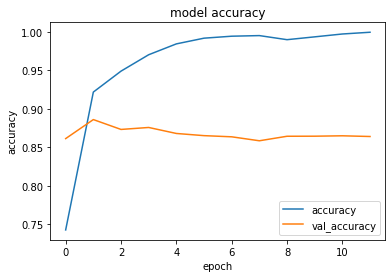

In [ ]:
accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

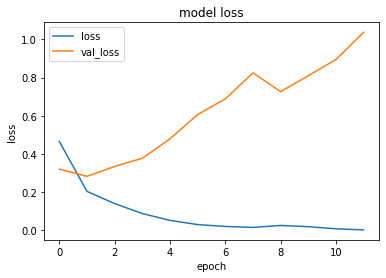

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
loss_and_metrics = model1.evaluate(X_train, y_train)
print("The train accuracy is: "+str(loss_and_metrics[1]))
loss_and_metrics = model1.evaluate(X_test, y_test)
print("The test accuracy is: "+str(loss_and_metrics[1]))

782/782 [==============================] - 11s 14ms/step - loss: 5.4776e-04 - accuracy: 0.9999
The train accuracy is: 0.9999200105667114
782/782 [==============================] - 11s 14ms/step - loss: 1.0371 - accuracy: 0.8640
The test accuracy is: 0.8640400171279907


In [ ]:
model1.evaluate(X_test, y_test)

782/782 [==============================] - 16s 21ms/step - loss: 1.0371 - accuracy: 0.8640


[1.0370584726333618, 0.8640400171279907]

# **GRU**

In [ ]:
# model
model3 = Sequential()

# Embedding
model3.add(Embedding(most_common, 32, input_length=pad))

# First Convolution1D Layer
model3.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))

model3.add(MaxPooling1D(pool_size=2))

# GRU Layer with Dropout
model3.add(GRU(128,dropout=0.2))
model3.add(Dropout(0.25))

# flatten and put a fully connected layer
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))

#sigmoid layer
model3.add(Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 450, 32)           320000    
                                                                 
 conv1d_3 (Conv1D)           (None, 450, 32)           3104      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 225, 32)          0         
 1D)                                                             
                                                                 
 gru (GRU)                   (None, 128)               61824     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                      

In [ ]:
model3.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
 history = model3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/12
196/196 [==============================] - 186s 928ms/step - loss: 0.5412 - accuracy: 0.7138 - val_loss: 0.3365 - val_accuracy: 0.8540
Epoch 2/12
196/196 [==============================] - 180s 918ms/step - loss: 0.2648 - accuracy: 0.8945 - val_loss: 0.3145 - val_accuracy: 0.8702
Epoch 3/12
196/196 [==============================] - 178s 910ms/step - loss: 0.1747 - accuracy: 0.9361 - val_loss: 0.3470 - val_accuracy: 0.8695
Epoch 4/12
196/196 [==============================] - 178s 907ms/step - loss: 0.1312 - accuracy: 0.9546 - val_loss: 0.3451 - val_accuracy: 0.8766
Epoch 5/12
196/196 [==============================] - 178s 908ms/step - loss: 0.0968 - accuracy: 0.9675 - val_loss: 0.4015 - val_accuracy: 0.8414
Epoch 6/12
196/196 [==============================] - 178s 907ms/step - loss: 0.0711 - accuracy: 0.9782 - val_loss: 0.4778 - val_accuracy: 0.8668
Epoch 7/12
196/196 [==============================] - 177s 904ms/step - loss: 0.0537 - accuracy: 0.9826 - val_loss: 0.5067 -

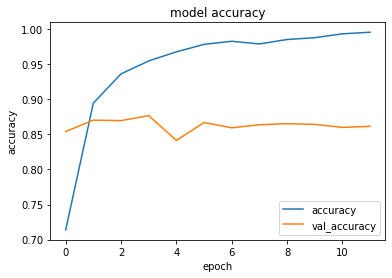

In [ ]:
accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

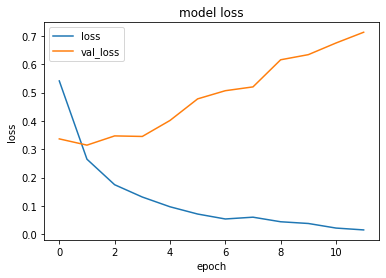

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
# pad dataset to a maximum review length in words
pad = 450
X_train = sequence.pad_sequences(X_train, maxlen=pad)
X_test = sequence.pad_sequences(X_test, maxlen=pad)
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

In [ ]:
print("\n test data")
print(X.shape)
print(y.shape)


 test data
(50000, 450)
(50000,)


In [ ]:
model.evaluate(X, y)

1563/1563 [==============================] - 11s 7ms/step - loss: 0.4481 - accuracy: 0.9328


[0.44814127683639526, 0.9327999949455261]

In [ ]:
y_pred = model.predict(X)

In [ ]:
y_pred[1234]

In [ ]:
print(y[1234])

In [ ]:
y_pred[12345]

In [ ]:
print(y[12345])